To compare TRI

Read each raster a X buffer 
Get the R2 and the RMSE from the metrics (error result file)
Plot each TRI histogram shape
Sumarize median


In [12]:
#Test

import matplotlib.pyplot as plt

tif_file='C:/Users/amgomez/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/TRI_1km_660400.tif'
img = plt.imread(tif_file)

# img.plot.hist(ax=ax,
#                        color="purple",
#                        bins=30)

In [13]:
img.shape

(304, 356, 4)

In [47]:
304*356

108224

In [21]:
from matplotlib.pyplot import imread, imshow, show, subplot, title, get_cmap, hist
from skimage.exposure import equalize_hist


ModuleNotFoundError: No module named 'skimage'

In [28]:
from osgeo import gdal
import numpy as np

dataset = gdal.Open(tif_file, gdal.GA_ReadOnly)
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
 # How about some band statistics?
band_min, band_max, band_mean, band_stddev = band.GetStatistics(0, 1)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,
                                                 minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band range: 0.0 - 1164.8879394531
Band mean, stddev: 17.385876995194, 105.86717671767



In [63]:
array.median_grouped()

AttributeError: 'numpy.ndarray' object has no attribute 'median_grouped'

In [20]:
eq = np.asarray(equalize_hist(img) * 255, dtype='uint8')

subplot(221); imshow(img, cmap=get_cmap('gray')); title('Original')
subplot(222); hist(img.flatten(), 256, range=(0,256)); title('Histogram of      origianl')
subplot(223); imshow(eq, cmap=get_cmap('gray'));  title('Histogram Equalized')
subplot(224); hist(eq.flatten(), 256, range=(0,256));

show()

NameError: name 'equalize_hist' is not defined

In [27]:
band_max

0.0

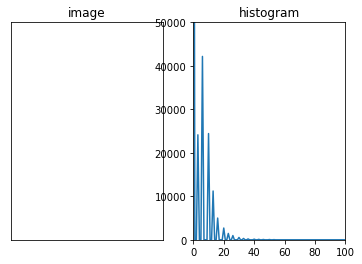

In [59]:
plt.subplot(1,2,1)
# plt.imshow(img,cmap='gray')
plt.title('image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(img.ravel(),500,[0,150])
plt.xlim([band_min,100])
plt.ylim([0,50000])
plt.plot(hist)
plt.title('histogram')

plt.show()

In [64]:
import rasterio
from rasterio.plot import show

# open the two rasters 
path='C:/Users/amgomez/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/'
dsm = rasterio.open(path+'TRI_1km_660400.tif', driver="GTiff")
dtm = rasterio.open(path+"TRI_3km_PHN2.tif", driver="GTiff")

# metadata functions from rasterio
print(dsm.meta)
print(dtm.meta)

# plot with rasterio.plot, which provides matplotlib functionality
show(dsm, title='Digital Surface Model', cmap='gist_ncar')

ModuleNotFoundError: No module named 'rasterio'